### This notebook walks your through reading in the datasets required for your project. All other elements of the notebook are to be designed from you based on what we have learned in the course thus far, including descriptive markdown and best practices.

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy
import cartopy.crs as ccrs
import cmocean 

### Load in averaged WOA18 datasets using xr.open_zarr and extract the respective DataArrays. These datasets contain ALL ocean oxygen measurements spanning the period 1955 to 2017.

In [39]:
woa18_o2 = xr.open_zarr('../data/woa18/woa_oxygen_dissolved_all',decode_times=False).dissolved
woa18_o2_sat = xr.open_zarr('../data/woa18/woa_oxygen_saturation_all',decode_times=False).oxygen_saturation
woa18_aou = xr.open_zarr('../data/woa18/woa_aou_all',decode_times=False).aou

### Documentation of the WOA18 product can be found [__here__](https://www.ncei.noaa.gov/access/world-ocean-atlas-2018/). You will be expected to be able to speak knowledgeably about the main ways in which we observe the ocean and what the World Ocean Atlas is. Spend some time researching this.

### For analysis at the basin scale you will need the ocean basins mask provided below. This seperates the global ocean into distinct basins identified by integer values such that:
* ### Southern Ocean = 1
* ### Atlantic Ocean = 2
* ### Pacific Ocean = 3
* ### Arctic Ocean = 4
* ### Indian Ocean = 5


In [40]:
woa18_basins = xr.open_dataset('../data/basins/woa18_basins_mask.nc',decode_times=False).mask

Text(0.5, 1.0, 'Ocean Basin Mask')

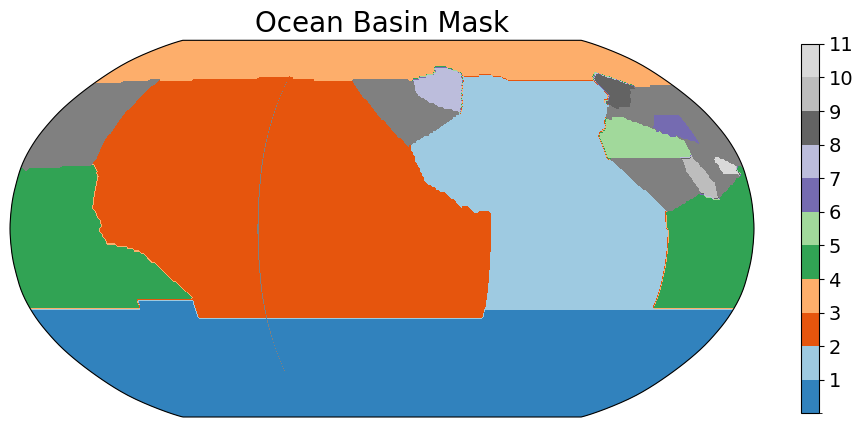

In [41]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

p = woa18_basins.plot.contourf(x='lon',y='lat',
                         cmap='tab20c',
                         vmin=0,vmax=11,levels=12,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[1,2,3,4,5,6,7,8,9,10,11], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("Ocean Basin Mask",fontsize=20)

### To isolate the Southern Ocean we can use Xarray's .where() method:


In [42]:
southernocean = (woa18_basins.where(woa18_basins==1) /  woa18_basins.where(woa18_basins==1)) ### Values 1 over atlantic, NaN elsewhere
atlanticocean = (woa18_basins.where(woa18_basins==2) / woa18_basins.where(woa18_basins==2)) ### Values 1 over atlantic, NaN elsewhere

### and so on for the other basins ..... work through the code above step by step
### to make sure you understand it.

In [43]:
atlanticocean

<xarray.DataArray 'mask' (lat: 180, lon: 360)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
    time     float32 438.0
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5

Text(0.5, 1.0, 'Ocean Basin Mask')

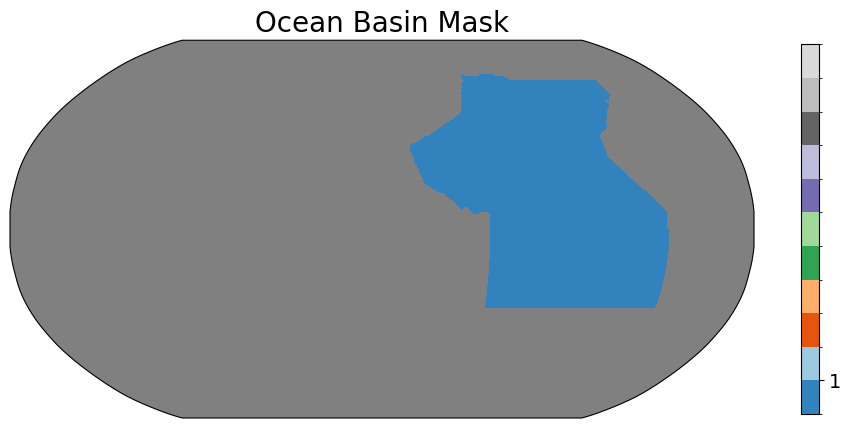

In [44]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

p = atlanticocean.plot.contourf(x='lon',y='lat',
                         cmap='tab20c',
                         vmin=0,vmax=11,levels =12,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[1], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("Ocean Basin Mask",fontsize=20)

Text(0.5, 1.0, 'Ocean Basin Mask')

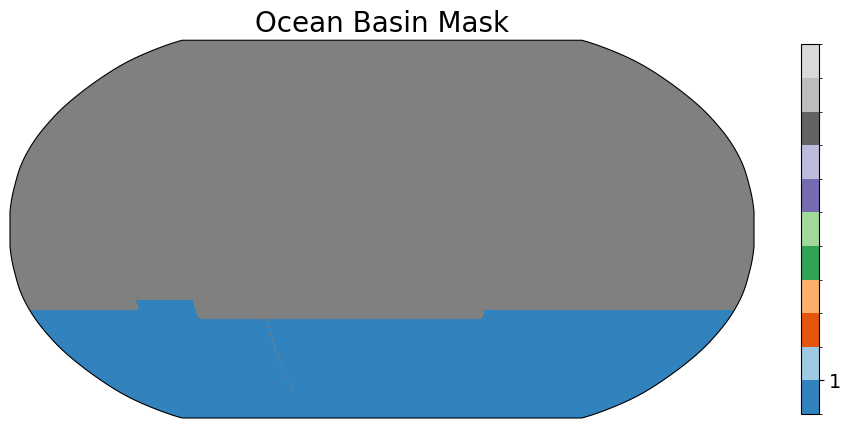

In [45]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

p = southernocean.plot.contourf(x='lon',y='lat',
                         cmap='tab20c',
                         vmin=0,vmax=11,levels =12,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[1], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("Ocean Basin Mask",fontsize=20)

### Now we can multiply our mask by the DataArray to isolate just the temperatures over a specific region:

In [46]:
woa18_aou_atlantic = woa18_aou*atlanticocean

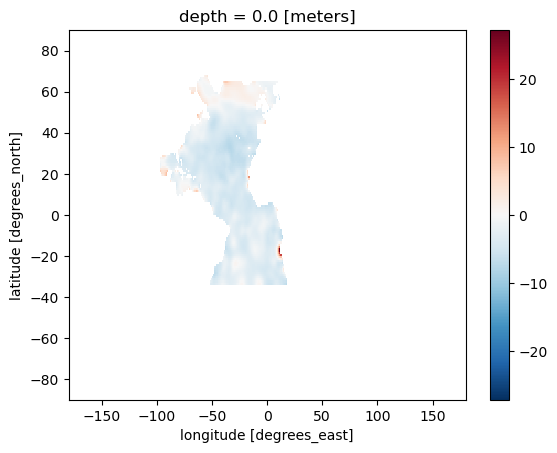

In [54]:
woa18_aou_atlantic.isel(depth=0).plot()

Text(0.5, 1.0, 'WOA AOU [μmol/kg]')

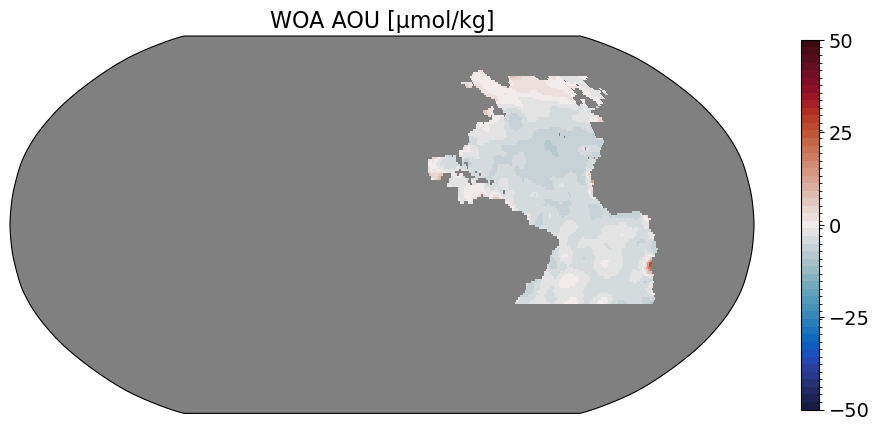

In [58]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

p = woa18_aou_atlantic.isel(depth=0).plot(x='lon',y='lat',
                         cmap=cmocean.cm.balance, vmin=-50, vmax=50, levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[-50,-25,0,25,50], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("WOA AOU [μmol/kg]",fontsize=16)

### The climate model output can be retrieved via the same methods we worked through in Unit 7 --- please refer back to that tutorial for working with CMIP6 data on Google Cloud Store and make the appropriate selection in the catalog to get your GFDL-ESM4 data for dissolved oxygen and oxygen saturation. Simulated AOU can be computed as AOU = O2 - O2 sat.

### The ESM4 basin mask can be found below and used in the same way as described above.

In [63]:
esm4_basins = xr.open_dataset('../data/basins/esm4_basins_gr.nc').basins

Text(0.5, 1.0, 'Ocean Basin Mask')

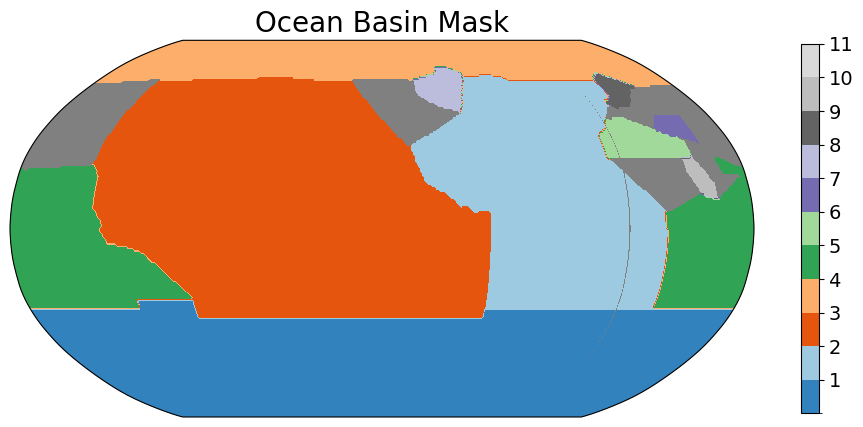

In [67]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

p = esm4_basins.plot.contourf(x='longitude',y='latitude',
                         cmap='tab20c',
                         vmin=0,vmax=11,levels=12,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[1,2,3,4,5,6,7,8,9,10,11], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("Ocean Basin Mask",fontsize=20)